# Decision Trees and Random Forests in Python

The goal of a decision tree is to choose a root node that will provide the best split between outcomes

## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

Read in the kyphosis csv and check out the head of the dataframe

In [5]:
df = pd.read_csv('kyphosis.csv')

In [6]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA - Exploratory Data Analysis

Lets use a pairplot to explore the dataset

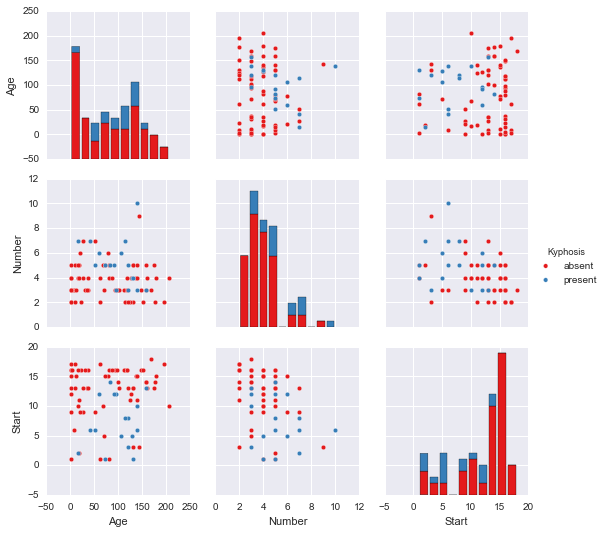

In [7]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Split the data into a training set and a test set

In [8]:
from sklearn.cross_validation import train_test_split

In [9]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

Train a single decision tree.

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtree = DecisionTreeClassifier()

In [13]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [14]:
predictions = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.95      0.91      0.93        23
    present       0.33      0.50      0.40         2

avg / total       0.90      0.88      0.89        25



In [17]:
print(confusion_matrix(y_test,predictions))

[[21  2]
 [ 1  1]]


## Random Forests

Now let's compare the decision tree model to a random forest.

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
rfc_pred = rfc.predict(X_test)

In [46]:
print(confusion_matrix(y_test,rfc_pred))

[[18  2]
 [ 3  2]]


In [47]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

     absent       0.86      0.90      0.88        20
    present       0.50      0.40      0.44         5

avg / total       0.79      0.80      0.79        25

